In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df= pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head(100)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
95,Super built-up Area,Ready To Move,Domlur,3 BHK,NaN,1540,3.0,2.0,90.00
96,Plot Area,Ready To Move,Kengeri,4 Bedroom,Goardth,2894,4.0,1.0,245.00
97,Super built-up Area,Ready To Move,Sarjapura - Attibele Road,3 BHK,NaN,1330,2.0,1.0,48.00
98,Built-up Area,Ready To Move,Devasthanagalu,2 BHK,NaN,1200,2.0,1.0,65.00


In [ ]:
df.drop(['area_type', 'availability', 'location','size','society','bath','balcony'], axis=1, inplace=True)

In [ ]:
print(df.to_string())

       total_sqft    price
0         1056.00    39.07
1         2600.00   120.00
2         1440.00    62.00
3         1521.00    95.00
4         1200.00    51.00
5         1170.00    38.00
6         2732.00   204.00
7         3300.00   600.00
8         1310.00    63.25
9         1020.00   370.00
10        1800.00    70.00
11        2785.00   295.00
12        1000.00    38.00
13        1100.00    40.00
14        2250.00   148.00
15        1175.00    73.50
16        1180.00    48.00
17        1540.00    60.00
18        2770.00   290.00
19        1100.00    48.00
20         600.00    15.00
21        1755.00   122.00
22        2800.00   380.00
23        1767.00   103.00
24         510.00    25.25
25        1250.00    56.00
26         660.00    23.10
27        1610.00    81.00
28        1151.00    48.77
29        1025.00    47.00
31        1075.00    35.00
32        1760.00   123.00
33        1693.00    57.39
34        1925.00   125.00
35         700.00    36.00
36        1070.00    45.50
3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13320 non-null  object 
 1   price       13320 non-null  float64
dtypes: float64(1), object(1)
memory usage: 208.2+ KB


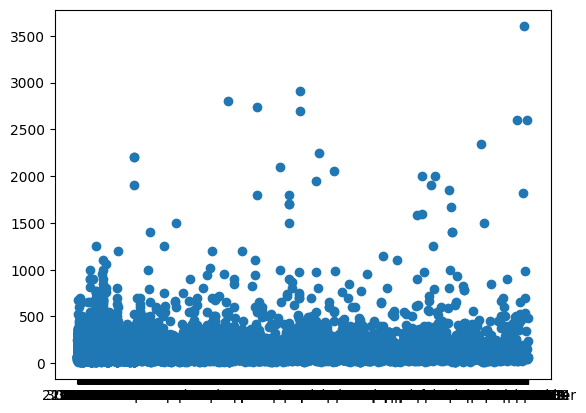

In [ ]:
plt.scatter(df.total_sqft,df.price)
plt.show()

In [ ]:
indices_to_drop = df[df['total_sqft'].str.contains('-')].index
df = df.drop(indices_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13119 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13119 non-null  object 
 1   price       13119 non-null  float64
dtypes: float64(1), object(1)
memory usage: 307.5+ KB


In [ ]:
df['total_sqft']= pd.to_numeric(df['total_sqft'], errors = 'coerce')
df['total_sqft'].isnull().sum()

46

In [ ]:
df= df.dropna(subset=['total_sqft'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13073 entries, 0 to 13319
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_sqft  13073 non-null  float64
 1   price       13073 non-null  float64
dtypes: float64(2)
memory usage: 306.4 KB


In [ ]:
reg =linear_model.LinearRegression()
reg.fit(df[['total_sqft']],df.price)

LinearRegression()

In [ ]:
reg.predict([[5000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([351.06726448])